## 아이디어

- 30타석 기준으로 자르기
- batter를 기준 데이터로
- 연봉은 제일 최신 연봉?
- hts : 최고타구속도, 평균각도, 배럴갯수, 배럴타구율

In [35]:
import pandas as pd

schedule = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_경기일정_2021.csv', encoding='cp949')
player_18 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2018.csv', encoding='cp949')
player_19 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2019.csv', encoding='cp949')
player_20 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2020.csv', encoding='cp949')
player_21 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2021.csv', encoding='cp949')
batter_18 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2018.csv', encoding='cp949')
batter_19 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2019.csv', encoding='cp949')
batter_20 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2020.csv', encoding='cp949')
batter_21 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2021.csv', encoding='cp949')
team = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_팀.csv', encoding='cp949')
hts_18 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018.csv', encoding='cp949')
hts_19 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019.csv', encoding='cp949')
hts_20 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020.csv', encoding='cp949')
hts_21 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021.csv', encoding='cp949')
# valid = pd.read_excel('./Valid/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_평가데이터.xlsx')

In [36]:
schedule

,G_ID,GDAY_DS,VISIT_KEY,HOME_KEY,HEADER_NO,GWEEK,STADIUM,ACG
0,20210403SSWO0,20210403.0,SS,WO,0,토,고척,1
1,20210404HHKT0,20210404.0,HH,KT,0,일,수원,1
2,20210404HTOB0,20210404.0,HT,OB,0,일,잠실,1
3,20210404LGNC0,20210404.0,LG,NC,0,일,창원,1
4,20210404LTSK0,20210404.0,LT,SK,0,일,문학,1
...,...,...,...,...,...,...,...,...
715,NaN,NaN,KT,WO,0,NaN,고척,2
716,NaN,NaN,NC,WO,0,NaN,고척,2
717,NaN,NaN,NC,WO,0,NaN,고척,2
718,NaN,NaN,NC,WO,0,NaN,고척,2


In [93]:
player[player['PCODE'] == 67450]

,GYEAR,PCODE,NAME,T_ID,POSITION,AGE_VA,MONEY
340,2018,67450,러프,SS,내,31,1400000달러
326,2019,67450,러프,SS,내,32,1300000달러


In [38]:
batter_20.head()

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD
0,2020,50054,66,77,69,0.203,14,0,17,0.246,0,7,15,0,1,0
1,2020,50066,26,32,30,0.200,6,1,11,0.367,0,2,11,0,0,1
2,2020,50150,23,31,30,0.367,11,0,13,0.433,0,1,6,0,0,2
3,2020,50165,117,494,431,0.278,120,38,255,0.592,4,55,136,5,4,7
4,2020,50202,68,41,37,0.270,10,0,10,0.270,1,2,5,0,0,1


In [39]:
hts_21.describe()

,GYEAR,PCODE,INN,HIT_VEL,HIT_ANG_VER,PIT_VEL
count,17964.0,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000
mean,2021.0,67633.956468,4.975006,134.391496,17.573859,135.868189
std,0.0,8406.789409,2.573506,19.476600,23.833166,9.126255
min,2021.0,50054.000000,1.000000,27.460000,-56.500000,97.220000
25%,2021.0,62925.000000,3.000000,122.940000,-1.400000,129.420000
50%,2021.0,66965.000000,5.000000,137.835000,14.400000,137.600000
75%,2021.0,75847.000000,7.000000,149.030000,32.100000,142.980000
max,2021.0,79608.000000,12.000000,176.820000,89.500000,155.840000


In [40]:
player = pd.concat([player_18, player_19, player_20, player_21])
batter = pd.concat([batter_18, batter_19, batter_20, batter_21])
hts = pd.concat([hts_18, hts_19, hts_20, hts_21])

In [41]:
hts

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척
...,...,...,...,...,...,...,...,...,...,...,...
17959,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구
17960,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구
17961,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구
17962,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구


## 배럴 모형 설정

- MLB와 KBO의 평균 타구속도 및 발사각도 비교
    - MLB와 KBO의 평균 타구속도/ 발사각도 비교
- 장타(홈런, 2루타, 3루타)의 평균 타구속도와 평균 발사각도 / 각각의 분포
- OPS 상위타자들의 평균 타구속도와 평균 타구각도

### 1. MLB와 KBO의 평균 타구속도 비교
- MLB 2018 ~ 2021 시즌데이터 (8월 12일기준)

In [42]:
mlb_bat = pd.read_csv('./mlb_batters.csv')
mlb_bat.head()

,last_name,first_name,player_id,year,slg_percent,on_base_percent,on_base_plus_slg,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,Unnamed: 12
0,Pujols,Albert,405395,2019,0.430,0.305,0.734,88.3,12.5,26.5,5.8,36.6,NaN
1,Cabrera,Miguel,408234,2019,0.398,0.346,0.744,90.4,12.3,37.7,6.7,44.6,NaN
2,Mathis,Jeff,425772,2019,0.224,0.209,0.433,86.1,16.9,29.6,1.4,26.4,NaN
3,Choo,Shin-Soo,425783,2019,0.455,0.371,0.826,91.9,9.1,32.1,9.0,48.7,NaN
4,Wainwright,Adam,425794,2019,0.220,0.169,0.389,87.9,14.6,27.0,0.0,22.2,NaN


- MLB 평균 타구속도

In [43]:
# mph단위를 km/h로 변환
mlb_bat['exit_velocity_avg'] = mlb_bat['exit_velocity_avg'] * 1.609344
mlb_bat['exit_velocity_avg'].mean()

141.9596045313522

- KBO 평균 타구속도

In [44]:
hts['HIT_VEL'].mean()

133.73217549380803

- 평균타구속도는 MLB 약 141.96km/h, KBO 약 133.73km/h로 약 8.23km/h 차이

### 2. MLB와 KBO의 평균 발사각도 비교
- MLB 평균 발사각도

In [45]:
mlb_bat['launch_angle_avg'].mean()

12.152253590886572

- KBO 평균 발사각도

In [46]:
hts['HIT_ANG_VER'].mean()

17.394403909064394

- 평균발사각도는 MLB 약 12.15도, KBO 약 17.39도로 약 -5.24도 차이

### 3. 장타(홈런, 2루타, 3루타)의 평균 타구속도와 평균 발사각도 / 각각의 분포
- 장타만 포함하는 dataframe 생성

In [47]:
hts_hr = hts[hts['HIT_RESULT'] == '홈런']
hts_2b = hts[hts['HIT_RESULT'] == '2루타']
hts_3b = hts[hts['HIT_RESULT'] == '3루타']
hts_slg = pd.concat([hts_hr, hts_2b, hts_3b])

# 5도 이하 타구는 제외, 수비 시프트의 영향이나 빠른 발을 통한 장타 제외 위함
hts_slg = hts_slg[hts_slg['HIT_ANG_VER'] > 5]
hts_slg.describe()

,GYEAR,PCODE,INN,HIT_VEL,HIT_ANG_VER,PIT_VEL
count,12614.000000,12614.000000,12614.000000,12614.000000,12614.000000,12614.000000
mean,2019.243380,69916.794990,4.937926,150.255418,22.771405,135.926508
std,1.060032,7296.372388,2.564484,12.134729,8.662602,9.030125
min,2018.000000,50054.000000,1.000000,74.760000,5.100000,97.920000
25%,2018.000000,64153.000000,3.000000,145.340000,16.500000,129.840000
50%,2019.000000,69453.000000,5.000000,152.240000,22.700000,137.790000
75%,2020.000000,76290.000000,7.000000,157.870000,28.300000,142.900000
max,2021.000000,99810.000000,12.000000,180.810000,65.400000,156.280000


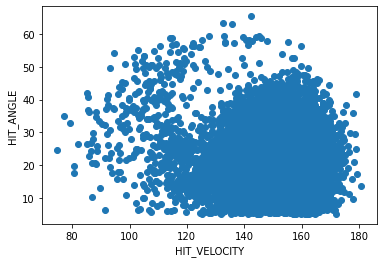

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax.scatter(x = hts_slg['HIT_VEL'], y = hts_slg['HIT_ANG_VER'])
plt.ylabel('HIT_ANGLE')
plt.xlabel('HIT_VELOCITY')
plt.show()

- 타구속도 : 120km ~ 170km 사이
- 발사각도 : 10도 ~ 40도 사이

### 4. OPS 상위타자들의 평균 타구속도와 평균 타구각도
- OPS 순위 구하기 (출루율 계산하여 장타율과 합산)
- 출루율 : (안타 + 볼넷 + 사구) / (총 타석)

In [49]:
batter.head()

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD
0,2018,60100,70,169,152,0.243,37,3,63,0.414,1,12,36,0,4,5
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0
3,2018,60343,83,174,162,0.216,35,8,63,0.389,0,8,49,0,3,3
4,2018,60456,4,8,6,0.500,3,0,3,0.500,0,2,0,0,0,0


In [50]:
batter['OBP'] = (batter['HIT'] + batter['BB'] + batter['HP']) / batter['PA']
batter['OPS'] = batter['SLG'] + batter['OBP']
batter.head()

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,OBP,OPS
0,2018,60100,70,169,152,0.243,37,3,63,0.414,1,12,36,0,4,5,0.313609,0.727609
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0,0.200000,0.500000
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0,0.000000,0.000000
3,2018,60343,83,174,162,0.216,35,8,63,0.389,0,8,49,0,3,3,0.264368,0.653368
4,2018,60456,4,8,6,0.500,3,0,3,0.500,0,2,0,0,0,0,0.625000,1.125000


- 선수별 평균 타구속도 및 발사각도 계산

In [79]:
hts_vel_grouped = hts.groupby(['GYEAR','PCODE'])['HIT_VEL'].mean()

In [70]:
hts_ang_grouped = hts.groupby(['GYEAR','PCODE'])['HIT_ANG_VER'].mean()

In [80]:
hts_vel_grouped = pd.DataFrame(hts_vel_grouped, columns=['HIT_VEL'])
hts_vel_grouped

HIT_VEL
GYEAR PCODE            
2018  60100  133.443196
      60184  137.428571
      60288   74.480000
      60343  132.035327
      60456  114.366667
...                 ...
2021  79290  130.472500
      79365  138.122803
      79402  132.975543
      79456  128.290323
      79608  137.182169

[1065 rows x 1 columns]

In [83]:
hts_ang_grouped = pd.DataFrame(hts_ang_grouped, columns=['HIT_ANG_VER'])
hts_ang_grouped

HIT_ANG_VER
GYEAR PCODE             
2018  60100    26.607216
      60184    25.814286
      60288    -2.400000
      60343    22.157944
      60456     9.566667
...                  ...
2021  79290    18.600000
      79365    18.375000
      79402    16.495429
      79456    10.256989
      79608    15.545783

[1065 rows x 1 columns]

In [84]:
batter.shape

(1098, 18)

In [86]:
batter = pd.merge(batter, hts_vel_grouped, how='left', on = ['GYEAR','PCODE'])
batter = pd.merge(batter, hts_ang_grouped, how='left', on = ['GYEAR','PCODE'])
batter

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,OBP,OPS,HIT_VEL,HIT_ANG_VER
0,2018,60100,70,169,152,0.243,37,3,63,0.414,1,12,36,0,4,5,0.313609,0.727609,133.443196,26.607216
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0,0.200000,0.500000,137.428571,25.814286
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0,0.000000,0.000000,74.480000,-2.400000
3,2018,60343,83,174,162,0.216,35,8,63,0.389,0,8,49,0,3,3,0.264368,0.653368,132.035327,22.157944
4,2018,60456,4,8,6,0.500,3,0,3,0.500,0,2,0,0,0,0,0.625000,1.125000,114.366667,9.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,2021,79290,4,8,8,0.125,1,0,1,0.125,0,0,2,0,0,0,0.125000,0.250000,130.472500,18.600000
1094,2021,79365,73,261,219,0.265,58,16,117,0.534,1,32,69,0,6,5,0.367816,0.901816,138.122803,18.375000
1095,2021,79402,70,278,237,0.211,50,1,61,0.257,0,30,26,0,3,7,0.298561,0.555561,132.975543,16.495429
1096,2021,79456,62,135,124,0.274,34,0,38,0.306,2,7,11,1,1,5,0.311111,0.617111,128.290323,10.256989


- 각 연도 OPS 상위 10명의 평균 타구속도와 평균 발사각도
    - 단, 250타석 이상 선수들 (2021시즌의 경우, 150타석 이상 선수들)만 포함

In [87]:
is_18 = batter['GYEAR'] == 2018
is_19 = batter['GYEAR'] == 2019
is_20 = batter['GYEAR'] == 2020
is_21 = batter['GYEAR'] == 2021
upper_250 = batter['PA'] >= 250
upper_150 = batter['PA'] >= 150

In [99]:
ops_top18 = batter[is_18 & upper_250]
ops_top18 = ops_top18.sort_values(by='OPS', ascending=False)
ops_top19 = batter[is_19 & upper_250]
ops_top19 = ops_top19.sort_values(by='OPS', ascending=False)
ops_top20 = batter[is_20 & upper_250]
ops_top20 = ops_top20.sort_values(by='OPS', ascending=False)
ops_top21 = batter[is_21 & upper_150]
ops_top21 = ops_top21.sort_values(by='OPS', ascending=False)